In [16]:
!pip install kneed


In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [18]:
features,true_labels=make_blobs(
n_samples=200,
centers=3,
cluster_std=2.75,
random_state=42)

In [19]:
true_labels

array([1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1,
       2, 0, 2, 0, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 1,
       2, 1, 1, 2, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2,
       0, 0, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0,
       1, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 2, 1, 1, 2,
       1, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 0, 1, 0, 1, 2,
       0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 2, 2, 1, 0, 2, 1, 2,
       1, 2, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1,
       0, 0, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 0,
       1, 1])

In [20]:
scalar=StandardScaler()
scaled_features=scalar.fit_transform(features)

In [22]:
kmeans=KMeans(
    init='random',
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [23]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [26]:
KMeans(init='random',n_clusters=3,random_state=42)


KMeans(init='random', n_clusters=3, random_state=42)

In [28]:
kmeans_kwargs={
    'init':'random',
    'n_init':10,
    'max_iter':300,
    'random_state':42
}
sse=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,**kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

C:\Users\deven\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


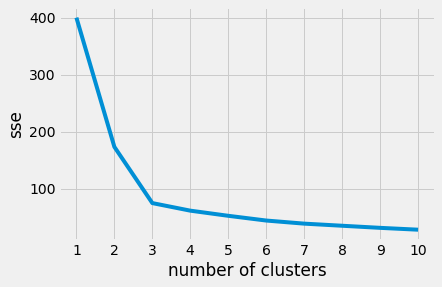

In [29]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel('number of clusters')
plt.ylabel('sse')
plt.show()

In [31]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,**kmeans_kwargs)
    kmeans.fit(scaled_features)
    score=silhouette_score(scaled_features,kmeans.labels_)
    silhouette_coefficients.append(score)

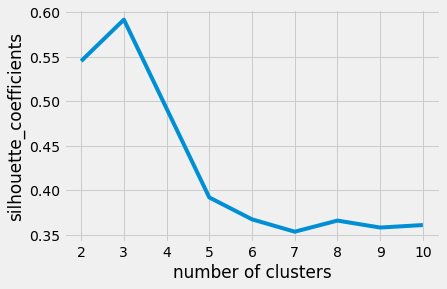

In [32]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('number of clusters')
plt.ylabel('silhouette_coefficients')
plt.show()